# Neural Network For Handwritten Digits Classification

In [18]:
import pandas as pd
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [28]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [29]:
x_train[1] # it is in 2D array where 0 --> black 252--> white

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [30]:
x_train[1].shape

(28, 28)

In [31]:
len(x_train)

60000

In [32]:
len(y_test)

10000

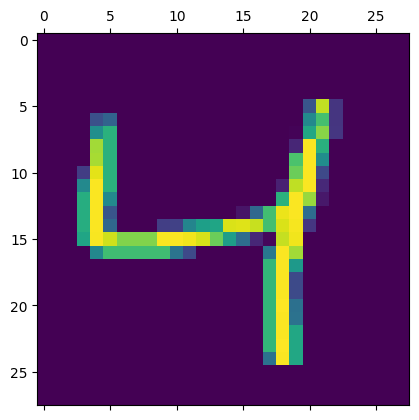

In [47]:
plt.matshow(x_train[2])

In [36]:
y_train[5]

2

In [37]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [38]:
# we have to convert 2D array to 1D array for getting the inputs for the neural netwok
# 28 x 28 array to 784

In [41]:
x_train.shape

(60000, 28, 28)

#####  Scaling in Machine Learning refers to the process of adjusting the range of features in your data so that they are on a similar scale.

In [55]:
# Scallinng is a technique in the ML which improves the accuracy of the model
x_train = x_train / 255
x_test = x_test / 255

In [56]:
x_train_flattaned = x_train.reshape(len(x_train),28*28)
x_test_flattaned = x_test.reshape(len(x_test),28*28)

In [57]:
x_train_flattaned.shape

(60000, 784)

In [58]:
x_test_flattaned.shape

(10000, 784)

In [59]:
x_train_flattaned[2]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [60]:
# Now will build Neural Network 

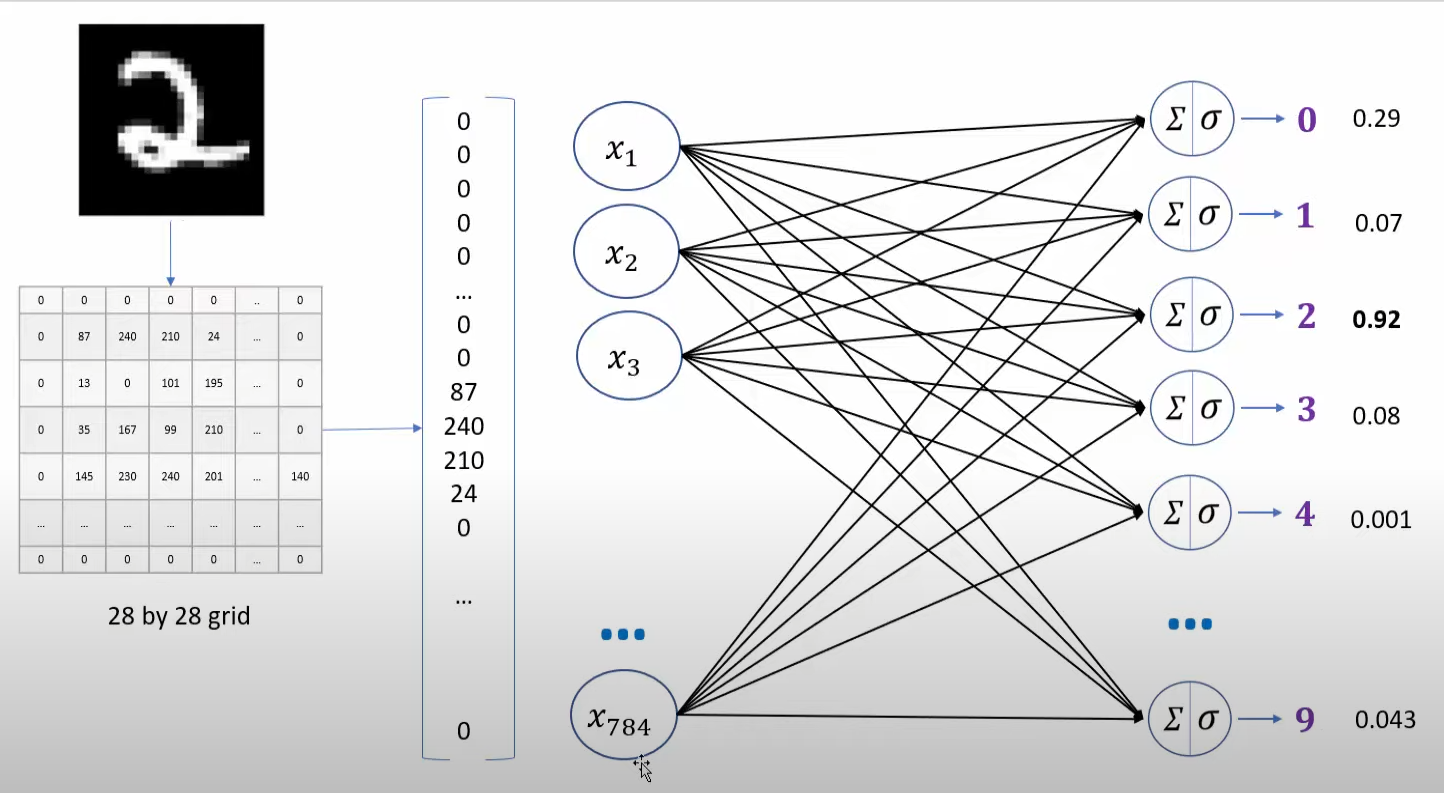

In [61]:
# sequential --> stack of layers in neural network
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flattaned, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4678 - accuracy: 0.8778
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3039 - accuracy: 0.9145
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2836 - accuracy: 0.9202
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2734 - accuracy: 0.9233
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2670 - accuracy: 0.9258


In [63]:
model.evaluate(x_test_flattaned, y_test) # accuracy on the test dataset

313/313 [==============================] - 1s 2ms/step - loss: 0.2670 - accuracy: 0.9243


[0.26701903343200684, 0.9243000149726868]

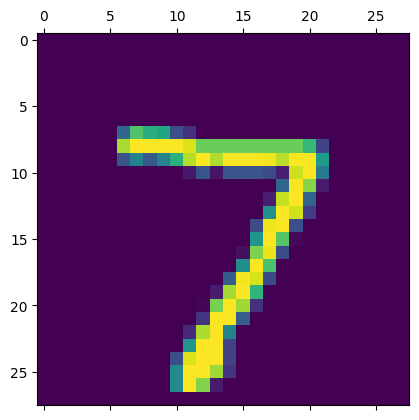

In [66]:
plt.matshow(x_test[0])

In [69]:
y_predict = model.predict(x_test_flattaned)
y_predict[0] # it will give 10 values , becoz we having neural network of 10 outputs

313/313 [==============================] - 0s 1ms/step


array([2.9638834e-02, 3.4324668e-07, 3.0802151e-02, 9.5926172e-01,
       2.9585049e-03, 1.0935531e-01, 1.5082728e-06, 9.9980682e-01,
       9.7426556e-02, 6.3685524e-01], dtype=float32)

In [70]:
# we have see maximum score from above for this we use numpy

In [72]:
np.argmax(y_predict[0]) # so Our model has predicted correct value

7

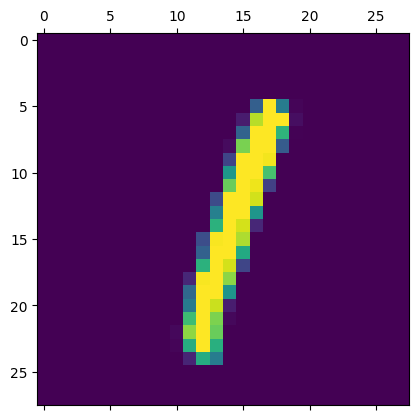

In [73]:
plt.matshow(x_test[5])

In [74]:
np.argmax(y_predict[5])

1

##### Our model performing well now....

#### Now will use hidden layer ,so it increase more accuracy 

## A hidden layer in a neural network is a layer between the input layer (where the data enters) and the output layer (where the predictions are made).

In [76]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flattaned, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2730 - accuracy: 0.9218
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1223 - accuracy: 0.9646
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0857 - accuracy: 0.9747
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0640 - accuracy: 0.9808
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0506 - accuracy: 0.9844


In [77]:
y_predicted = model.predict(x_test_flattaned)
y_predicted[0]

313/313 [==============================] - 1s 2ms/step


array([8.0459844e-03, 1.4365891e-04, 3.9638695e-01, 9.1944993e-01,
       9.7013287e-07, 6.7608826e-02, 1.6941864e-06, 9.9998111e-01,
       1.3998169e-01, 2.0832713e-01], dtype=float32)

In [78]:
np.argmax(y_predicted[0])

7

# Using Flatten layer so that we don't have to call .reshape on input dataset

In [79]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),# using this we dont need convert 2d to 3D
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2731 - accuracy: 0.9222
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1211 - accuracy: 0.9649
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0867 - accuracy: 0.9739
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0649 - accuracy: 0.9811
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0515 - accuracy: 0.9849
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0419 - accuracy: 0.9869
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0343 - accuracy: 0.9898
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0276 - accuracy: 0.9919
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0236 - accuracy: 0.9929
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.019

In [80]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0798 - accuracy: 0.9787


[0.07979510724544525, 0.9786999821662903]

In [82]:
predict = model.predict(x_test)

313/313 [==============================] - 1s 1ms/step


In [83]:
predict[0]

array([1.3460575e-04, 4.8269540e-05, 2.1948719e-01, 8.7073457e-01,
       5.4856115e-09, 5.6965649e-04, 2.2574917e-12, 9.9999315e-01,
       1.3561900e-02, 1.3868605e-02], dtype=float32)

In [84]:
np.argmax(predict[0])

7